In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split

np.random.seed(0)

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
# with tf.device('/CPU:0'):

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                'Z':25}


order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                'T',  'U',  'V',  'W',  'X',  'Y',  'Z')




lb=LabelBinarizer()
hotEncodedLabels=lb.fit_transform(order_list)




train_dir="asl_alphabet_train/asl_alphabet_train"

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
                temp_img = cv2.imread(train_dir + '/' + folder + '/' + image, 0) # greyscale
                temp_img = cv2.resize(temp_img, size)
                temp_img = temp_img.flatten()
                images.append(temp_img)
                labels.append(hotEncodedLabels[labels_dict[folder]])
            
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.8,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [6]:
# with tf.device('/CPU:0'):
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()


print(len(X_train))
print(len(X_validation))
print(len(X_test))

LOADING DATA FROM : U | R | N | I | Z | G | T | S | F | H | M | A | O | C | J | V | D | P | Q | Y | B | X | K | L | E | W | 
Loaded 54614 images for training, Train data shape = (54614, 4096)
Loaded 18726 images for validation validation data shape = (18726, 4096)
Loaded 4681 images for testing Test data shape = (4681, 4096)
54614
18726
4681


26_class_5layers.ipynb  asl_alphabet_train/  Untitled0.ipynb
asl_alphabet_test/      Untitled


In [ ]:
# with tf.device('/CPU:0'):
#     y_tr=[]
#     for i in Y_train:
#         y_tr.append(i.tolist())
#     y_train_t=tf.convert_to_tensor(
#         y_tr, dtype=None, dtype_hint=None, name=None
#     )

#     X_tr=[]
#     for i in X_train:
#         X_tr.append(i.tolist())
#     X_train_t=tf.convert_to_tensor(
#         X_tr, dtype=None, dtype_hint=None, name=None
#     )

#     y_vald=[]
#     for i in Y_validation:
#         y_vald.append(i.tolist())
#     y_vald_t=tf.convert_to_tensor(
#         y_vald, dtype=None, dtype_hint=None, name=None
#     )

In [9]:
# with tf.device('/CPU:0'):
acc=0





(hidden1_size, hidden2_size) = (1040, 520)
x = tf.placeholder(tf.float32, [None, 4096])
y_ = tf.placeholder(tf.float32, [None, 26])

W1 = tf.Variable(tf.truncated_normal([4096, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(tf.truncated_normal([hidden2_size, 26], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[26]))



pred = tf.nn.softmax(tf.matmul(z2, W3)+b3)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)


data_x=np.array(X_train)
data_y=np.array(Y_train)  
data_arr_x=[data_x[0::5],data_x[1::5],data_x[2::5],data_x[3::5],data_x[4::5]]
data_arr_y=[data_y[0::5],data_y[1::5],data_y[2::5],data_y[3::5],data_y[4::5]]


sess1 = tf.Session()
sess1.run(tf.global_variables_initializer())

correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("start")
for i in range (30000):
    sess1.run(train_step, feed_dict={x: X_train, y_: Y_train})
    if i % 1000 == 0 :
    # print(i, sess1.run(accuracy, feed_dict={x: X_validation, y_: Y_validation}))
      acc1=sess1.run(accuracy, feed_dict={x: X_validation, y_: Y_validation})
      acc=max(acc,acc1)
      print(i," this epoch accuracy: ",acc1," best accuracy seen when checked ", acc)


        


start
0  this epoch accuracy:  0.042828154  best accuracy seen when checked  0.042828154
1000  this epoch accuracy:  0.23032148  best accuracy seen when checked  0.23032148
2000  this epoch accuracy:  0.3168322  best accuracy seen when checked  0.3168322
3000  this epoch accuracy:  0.37119514  best accuracy seen when checked  0.37119514
4000  this epoch accuracy:  0.4201111  best accuracy seen when checked  0.4201111
5000  this epoch accuracy:  0.45994875  best accuracy seen when checked  0.45994875
6000  this epoch accuracy:  0.49012068  best accuracy seen when checked  0.49012068
7000  this epoch accuracy:  0.51778275  best accuracy seen when checked  0.51778275
8000  this epoch accuracy:  0.543202  best accuracy seen when checked  0.543202
9000  this epoch accuracy:  0.5634412  best accuracy seen when checked  0.5634412
10000  this epoch accuracy:  0.582292  best accuracy seen when checked  0.582292
11000  this epoch accuracy:  0.5996475  best accuracy seen when checked  0.5996475
1

In [ ]:
# # with tf.device('/CPU:0'):
# y_tr=[]
# for i in Y_train:
#     y_tr.append(i.tolist())
# y_train_t=tf.convert_to_tensor(
#     y_tr, dtype=None, dtype_hint=None, name=None
# )

# X_tr=[]
# for i in X_train:
#     X_tr.append(i.tolist())
# X_train_t=tf.convert_to_tensor(
#     X_tr, dtype=None, dtype_hint=None, name=None
# )



0.7754753


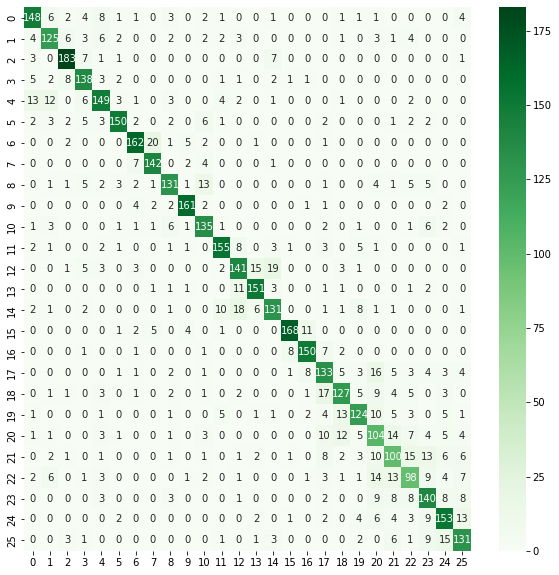

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# function to make pretty confusion matrix
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

# make a tensor with the y validation 
y_vald=[]
for i in Y_test:
    y_vald.append(i.tolist())
y_vald_t=tf.convert_to_tensor(
    y_vald, dtype=None, dtype_hint=None, name=None
)


# get the prediction foe x validation

mypred=sess1.run(pred,feed_dict={x: X_test, y_: Y_test})


# check accuracy
correct_prediction1 = tf.equal(tf.argmax(mypred,1), tf.argmax(y_vald_t,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess1.run(accuracy1))


# take mypred change to a list then to a tensor
mypred_l=[]
for i in mypred:
    mypred_l.append(i.tolist())

mypred_t=tf.convert_to_tensor(
    mypred_l, dtype=None, dtype_hint=None, name=None
)


# create a list with the pred class
pred_confussion_matrix=[]
for i in sess1.run(mypred_t):
    pred_confussion_matrix.append( np.argmax(i))

# create a list with the actual class
Y_validation_confussion_matrix=[]
for i in sess1.run(y_vald_t):
    Y_validation_confussion_matrix.append( np.argmax(i))

# create the cunfusion matrix
confussion_matrix(confusion_matrix(Y_validation_confussion_matrix,pred_confussion_matrix))

In [11]:
saver = tf.train.Saver()
saver.save(sess1, "26class_2layers_30000iter")

'26class_2layers_30000iter'

In [ ]:
# 26 classes , 2 layers , 1040 , 520 , 1000 iterations , accuracy 0.228
# 26 classes , 2 layers , 1040 , 520 , 5000 iterations , accuracy 0.463